In [33]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    roc_curve,
    roc_auc_score,
)
import matplotlib.pyplot as plt


import lightgbm as lgb

import numpy as np

In [34]:
cluster_with_guastocavo_labels = pd.read_csv("20230101-20240101_real_time_clusters_filtered_guasto_cavo.csv")
train_df = pd.read_parquet("train_df_link_lp.parquet")
merge_train_df = pd.merge(train_df, cluster_with_guastocavo_labels, on='cluster_id2', how='left')
merge_train_df.set_index('cluster_id2', inplace=True)
val_df = pd.read_parquet("val_df_link_lp.parquet")
merge_val_df = pd.merge(val_df, cluster_with_guastocavo_labels, on='cluster_id2', how='left')
merge_val_df.set_index('cluster_id2', inplace=True)
test_df = pd.read_parquet("test_df_link_lp.parquet")
merge_test_df = pd.merge(test_df, cluster_with_guastocavo_labels, on='cluster_id2', how='left')
merge_test_df.set_index('cluster_id2', inplace=True)

In [35]:
# Caricare i dataset
# Separare le feature dalle etichette
X_train = merge_train_df.drop(columns=['GUASTO CAVO'])  
y_train = merge_train_df['GUASTO CAVO']

X_val = merge_val_df.drop(columns=['GUASTO CAVO'])
y_val = merge_val_df['GUASTO CAVO']

X_test = merge_test_df.drop(columns=['GUASTO CAVO'])
y_test = merge_test_df['GUASTO CAVO']

## Random Forest

In [36]:
# Inizializzare e allenare il modello Random Forest
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train.values.ravel())  # Assicurarsi che y_train sia un array 1D

# Valutare il modello sul set di validazione
y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Valutare il modello sul set di test
y_test_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Validation Accuracy: 0.855072463768116
Validation Classification Report:
              precision    recall  f1-score   support

       False       0.66      0.36      0.47        97
        True       0.88      0.96      0.92       455

    accuracy                           0.86       552
   macro avg       0.77      0.66      0.69       552
weighted avg       0.84      0.86      0.84       552

Test Accuracy: 0.8227848101265823
Test Classification Report:
              precision    recall  f1-score   support

       False       0.65      0.36      0.46       117
        True       0.85      0.95      0.89       436

    accuracy                           0.82       553
   macro avg       0.75      0.65      0.68       553
weighted avg       0.80      0.82      0.80       553



## Logistic Regression

Validation Accuracy: 0.8369565217391305
Validation Classification Report:
              precision    recall  f1-score   support

       False       0.59      0.23      0.33        97
        True       0.85      0.97      0.91       455

    accuracy                           0.84       552
   macro avg       0.72      0.60      0.62       552
weighted avg       0.81      0.84      0.81       552

Test Accuracy: 0.8047016274864376
Test Classification Report:
              precision    recall  f1-score   support

       False       0.63      0.19      0.29       117
        True       0.82      0.97      0.89       436

    accuracy                           0.80       553
   macro avg       0.72      0.58      0.59       553
weighted avg       0.78      0.80      0.76       553



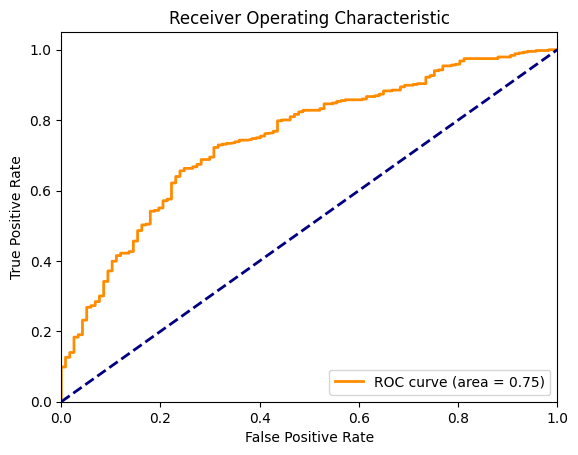

In [37]:
clf = LogisticRegression(random_state=42, max_iter=200)
clf.fit(X_train, y_train.values.ravel())  # Assicurarsi che y_train sia un array 1D

# Valutare il modello sul set di validazione
y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Valutare il modello sul set di test
y_test_pred = clf.predict(X_test)
y_test_pred_proba = clf.predict_proba(X_test)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Tracciare la ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = roc_auc_score(y_test, y_test_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Support Vector Machines

In [38]:
# Inizializzare e allenare il modello SVM
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train.values.ravel())  # Assicurarsi che y_train sia un array 1D

# Valutare il modello sul set di validazione
y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Valutare il modello sul set di test
y_test_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Validation Accuracy: 0.8478260869565217
Validation Classification Report:
              precision    recall  f1-score   support

       False       0.70      0.24      0.35        97
        True       0.86      0.98      0.91       455

    accuracy                           0.85       552
   macro avg       0.78      0.61      0.63       552
weighted avg       0.83      0.85      0.82       552

Test Accuracy: 0.8065099457504521
Test Classification Report:
              precision    recall  f1-score   support

       False       0.62      0.22      0.33       117
        True       0.82      0.96      0.89       436

    accuracy                           0.81       553
   macro avg       0.72      0.59      0.61       553
weighted avg       0.78      0.81      0.77       553



## Gradient Boosting Machines

In [39]:
# Creazione dei dataset LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Definizione dei parametri
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'learning_rate': 0.5,
    'num_leaves': 31,
    'max_depth': -1,
    'feature_fraction': 0.9,
    'force_row_wise': True
}

# Addestramento del modello
num_round = 1000
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Predizione
y_pred = bst.predict(X_val, num_iteration=bst.best_iteration)
print(y_pred)
y_pred_classes = np.round(y_pred)  # Arrotonda a 0 o 1

# Calcolo e stampa del classification report
report = classification_report(y_val, y_pred_classes)
print(report)

# Predizione
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_classes = np.round(y_pred)  # Arrotonda a 0 o 1

# Calcolo e stampa del classification report
report = classification_report(y_test, y_pred_classes)
print(report)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2125, number of negative: 451
[LightGBM] [Info] Total Bins 474
[LightGBM] [Info] Number of data points in the train set: 2576, number of used features: 237
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.824922 -> initscore=1.550060
[LightGBM] [Info] Start training from score 1.550060
[9.99500335e-01 9.99945414e-01 9.76565727e-01 6.93470013e-01
 9.96624291e-01 9.99519615e-01 9.99993808e-01 9.99956396e-01
 9.99550039e-01 9.99931983e-01 9.95383200e-01 9.91487979e-01
 6.71949879e-01 2.98995992e-05 9.99959738e-01 9.48517218e-01
 9.99913166e-01 9.83289640e-01 9.62926634e-01 8.83245244e-01
 9.99995533e-01 9.99202512e-01 1.05455773e-02 9.05526038e-01
 9.99846557e-01 6.59939982e-01 9.89109132e-01 9.99999892e-01
 9.99999907e-01 9.99999998e-01 9.99999991e-01 9.86761814e-01
 9.93170863e-01 9.56210842